<a href="https://colab.research.google.com/github/sener7106/TiL/blob/main/ML_Chap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01-3 마켓과 머신러닝

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

- 머신러닝에서 여러개의 종류를 클래스(Class)라고 하고, 이 중 하나를 구별해 내는 문제를 분류(Classification)이라고말함.

- 첫번째는 도미의 길이, 두번쨰는 도미의 무게를 뜻함, 각 도미의 특징을 길이와 무게로 표현한 것이 특성(Feature)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

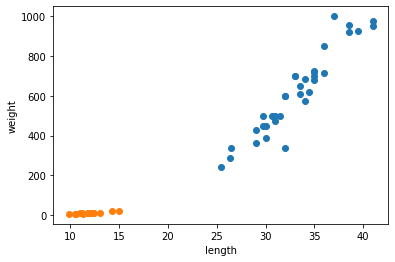

In [4]:
# 빙어와 도미의 무게를 함께 그린 산점도
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show()

In [5]:
# k-Nearest Neighbors

In [6]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [7]:
print(length, '\n', weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] 
 [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [8]:
fish_data = [[l, w] for l, w in zip(length, weight)]

In [9]:
fish_target = [1] * 35 + [0] * 14

## KNeighborsClassifiser 알고리즘
- 주변에서 가장 가까운 5개의 데이터를 보고 다수결의 원칙에 따라 데이터를 예측하는 알고리즘.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# 분류 모델 객체 인스턴스 생성
kn = KNeighborsClassifier()

- 훈련 : 모델에 데이터를 전달하여 규칙을 학습하는 과정
- Score() : 사이킷 런에서 모델을 평가하는 메서드, 1에 가까울수록 정확도(accuracy)가 높음

In [12]:
# 훈련 학습 진행

kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [13]:
kn.score(fish_data, fish_target)

1.0

In [14]:
kn.predict([[30, 600]])

array([1])

In [15]:
#print(kn._fit_X)

In [16]:
kn49 = KNeighborsClassifier(n_neighbors = 49)

In [17]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

#02-1 훈련 세트와 테스트 세트

- 지도학습과 비지도 학습
- 입력(Input) 과 타깃(Target), - 이 둘을 합쳐 training data라 함.
- 입력으로 사용된 특성은 feature
- 여기서 정답(target)이 있는 학습 방법이 지도 학습, 입력만이 존재하는 경우 비지도 학습이라고 한다.

- 평가에 사용되는 데이터를 테스트셋, 훈련에 사용되는 데이터를 훈련 셋이라고 함.

In [18]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [19]:
len(fish_length)

49

In [20]:
len(fish_weight)

49

In [21]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

- 이 때, 하나의 데이터를 sample이라 한다.

In [22]:
# 처음 35개와 나머지 14개를 슬라이싱을 이용하여 선택

train_input = fish_data[:35] # 훈련세트로 입력값 중 0 ~ 34번째 인덱스 사용
train_target = fish_target[:35]

test_input = fish_data[35:] # 테스트 셋으로 입력값 중 35 ~ 마지막 인덱스를 사용
test_target = fish_target[35:] 


In [23]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### 샘플링 편향
- score accuracy 값이 0.0이 나온 원인
- 훈련 셋과 테스트 셋을 나누기 위해 데이터를 골고루 섞어 주어야 할 필요가 있어야함. 골고루 섞여있지 않는 경우 샘플링이 한쪽으로 치우치게 된다.
- 넘파이를 이용해서 arrange 하기.


In [24]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [25]:
np.random.seed(42)
index = np.arange(len(input_arr))
np.random.shuffle(index)

In [26]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [27]:
# 처음 35개와 나머지 14개를 슬라이싱을 이용하여 선택

train_input = input_arr[index[:35]] # 훈련세트로 입력값 중 0 ~ 34번째 인덱스 사용
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]] # 테스트 셋으로 입력값 중 35 ~ 마지막 인덱스를 사용
test_target = target_arr[index[35:]]

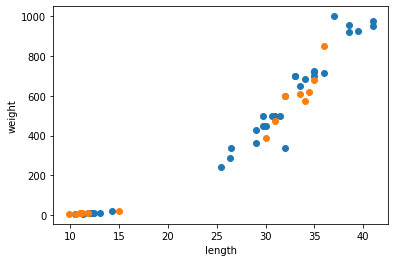

In [28]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[: , 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
kn = kn.fit(train_input, train_target)

In [30]:
kn.score(test_input, test_target)

1.0

In [31]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [32]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [34]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_data = np.column_stack((fish_length, fish_weight))

In [37]:
""" # 사이킷런으로 훈련 셋, 테스트 셋 나누기"""

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [42]:
""" ## 수상한 도미 한마리 """

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [44]:
print(kn.predict([[25, 150]]))

[0.]


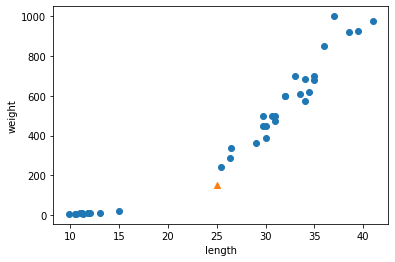

In [45]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker  = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
distances, indexes = kn.kneighbors([[25, 150]])

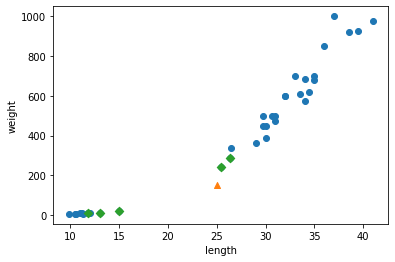

In [48]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker  = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker ='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [49]:
print(distances)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


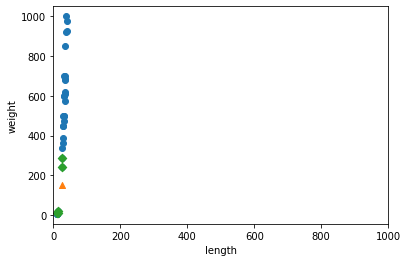

In [50]:
""" ## 기준을 맞춰라 """

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [51]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

# 표준편차와 평균 구하기
print(mean, std)

train_scaled = (train_input - mean) / std

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


## 특성의 기준을 맞추기 위해 사용되는 지표 - 표준점수

- 표준점수를 이용한 데이터 전처리


```train_scaled = (train_input - mean) / std ```

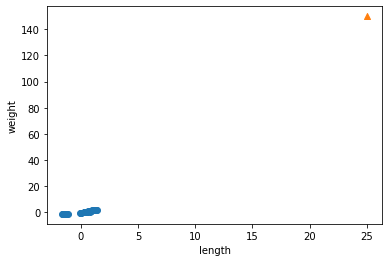

In [53]:
""" ## 전처리 데이터로 모델 훈련하기 """
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

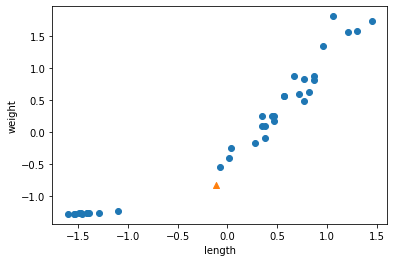

In [56]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [57]:
kn.fit(train_scaled,train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled , test_target)
print(kn.predict([new]))

[1.]


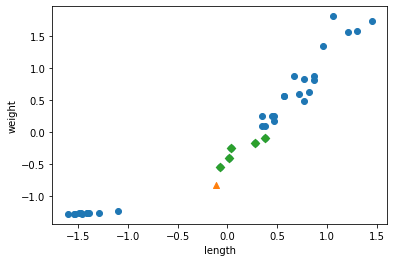

In [58]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker ='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
